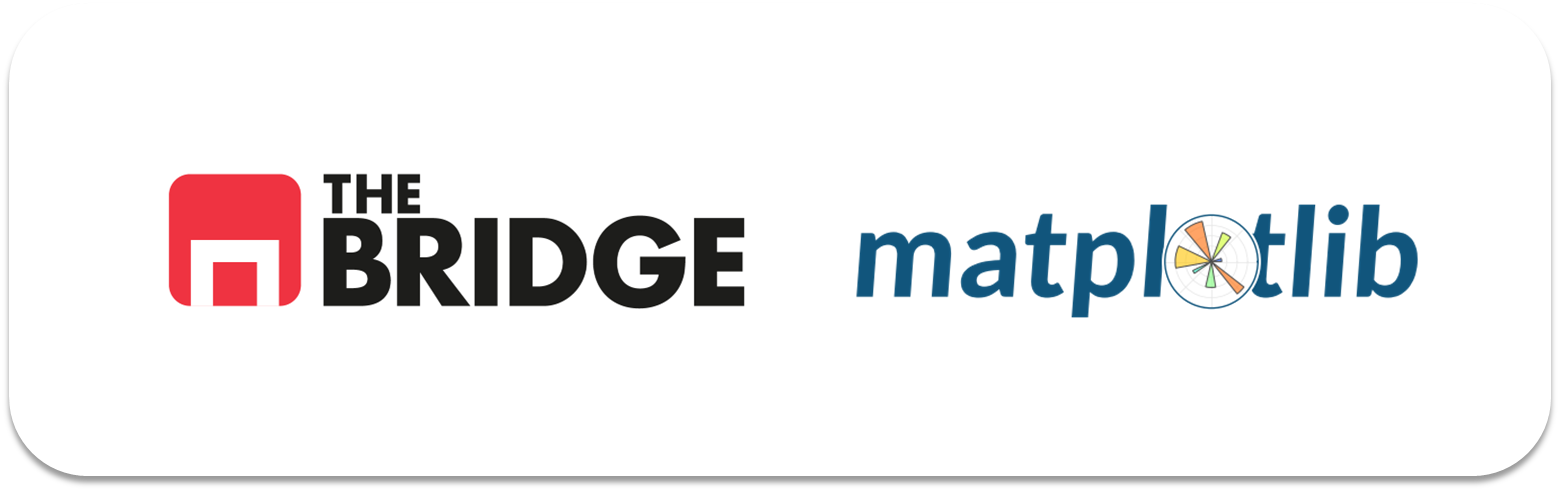

## PRACTICA OBLIGATORIA: **Visualización Básica**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.options.mode.copy_on_write = True

### Ejercicio 1

#### #1.1

- Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv".  
- Muestra parte de su contenido y su descripción.  
- Deshazte de las filas con nulos.

In [10]:
df = pd.read_csv("./data/california_cities.csv")
df.isnull().sum()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


In [ ]:
ft_nulo = df['elevation_ft'].isna() & df['elevation_m'].notna()
df.loc[ft_nulo, 'elevation_ft'] = df.loc[ft_nulo, 'elevation_m'] * 3.28084
m_nulo = df['elevation_m'].isna() & df['elevation_ft'].notna()
df.loc[m_nulo, 'elevation_m'] = df.loc[m_nulo, 'elevation_ft'] / 3.28084

df['elevation_m'].fillna(df['elevation_m'].median(), inplace=True)
df['elevation_ft'].fillna(df['elevation_ft'].median(), inplace=True)

In [ ]:
# total_sq_mi = land + water
total_nulo = df['area_total_sq_mi'].isna() & df['area_land_sq_mi'].notna() & df['area_water_sq_mi'].notna()
df.loc[total_nulo, 'area_total_sq_mi'] = df.loc[total_nulo, 'area_land_sq_mi'] + df.loc[total_nulo, 'area_water_sq_mi']

# water_sq_mi = total - land
water_nulo = df['area_water_sq_mi'].isna() & df['area_total_sq_mi'].notna() & df['area_land_sq_mi'].notna()
df.loc[water_nulo, 'area_water_sq_mi'] = df.loc[water_nulo, 'area_total_sq_mi'] - df.loc[water_nulo, 'area_land_sq_mi']

In [21]:
# total km2 from sq_mi
total_km_nulo = df['area_total_km2'].isna() & df['area_total_sq_mi'].notna()
df.loc[total_km_nulo, 'area_total_km2'] = df.loc[total_km_nulo, 'area_total_sq_mi'] * 2.58999

# land km2
land_km_nulo = df['area_land_km2'].isna() & df['area_land_sq_mi'].notna()
df.loc[land_km_nulo, 'area_land_km2'] = df.loc[land_km_nulo, 'area_land_sq_mi'] * 2.58999

# water km2
water_km_nulo = df['area_water_km2'].isna() & df['area_water_sq_mi'].notna()
df.loc[water_km_nulo, 'area_water_km2'] = df.loc[water_km_nulo, 'area_water_sq_mi'] * 2.58999

In [23]:
df['area_water_percent'] = (df['area_water_km2'] / df['area_total_km2']) * 100

In [24]:
print(df.isnull().sum())

Unnamed: 0            0
city                  0
latd                  0
longd                 0
elevation_m           0
elevation_ft          0
population_total      0
area_total_sq_mi      0
area_land_sq_mi       0
area_water_sq_mi      0
area_total_km2        0
area_land_km2         0
area_water_km2        0
area_water_percent    0
dtype: int64


#### #1.2  

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro.  

Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)  

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand ITC", tamaño 18, color azul acero o "steelblue")
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

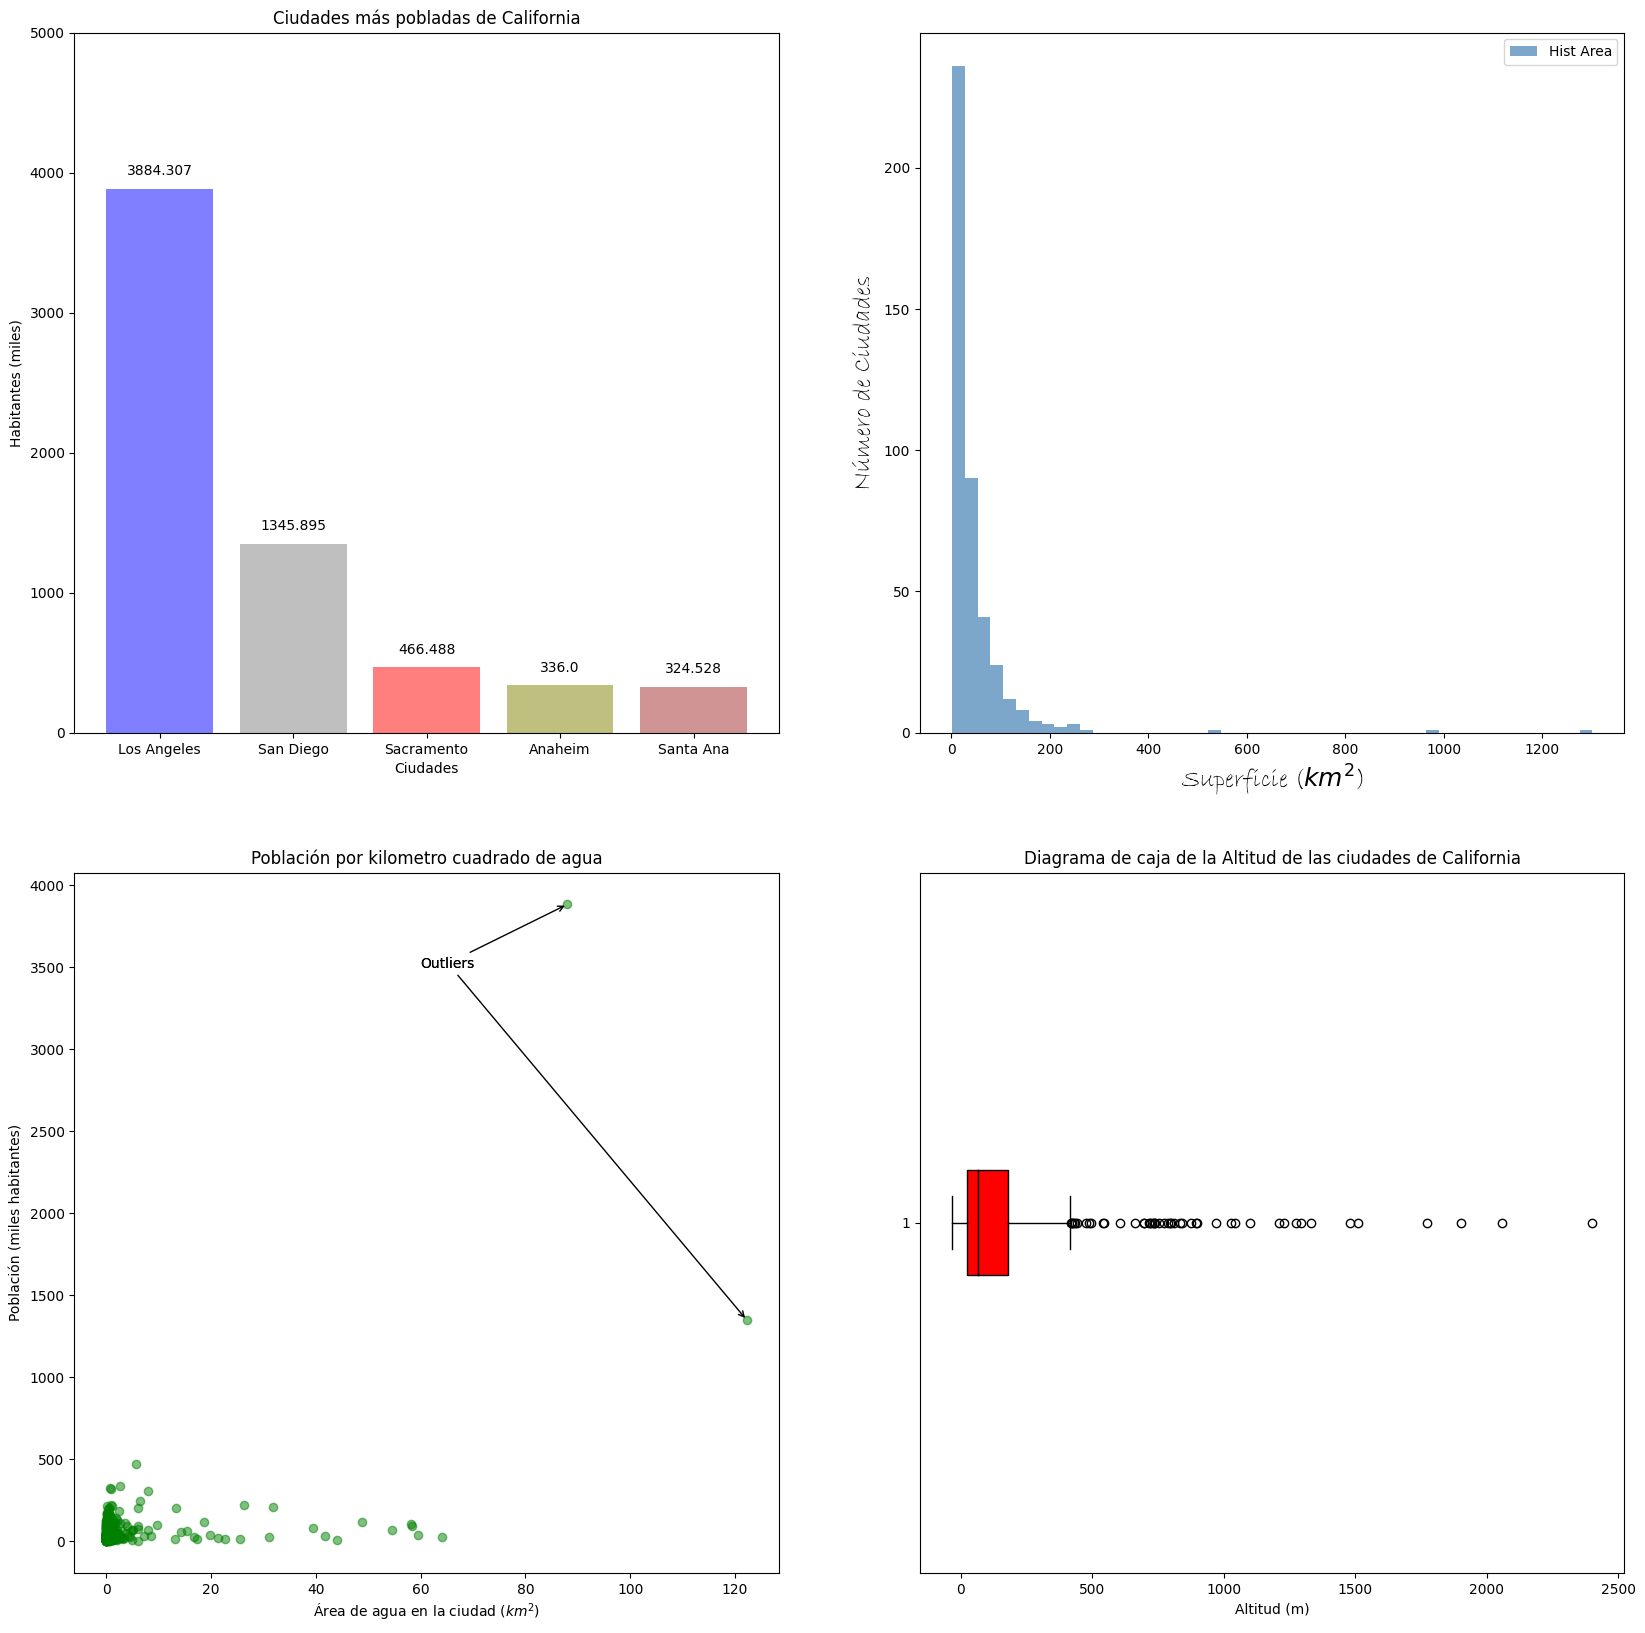

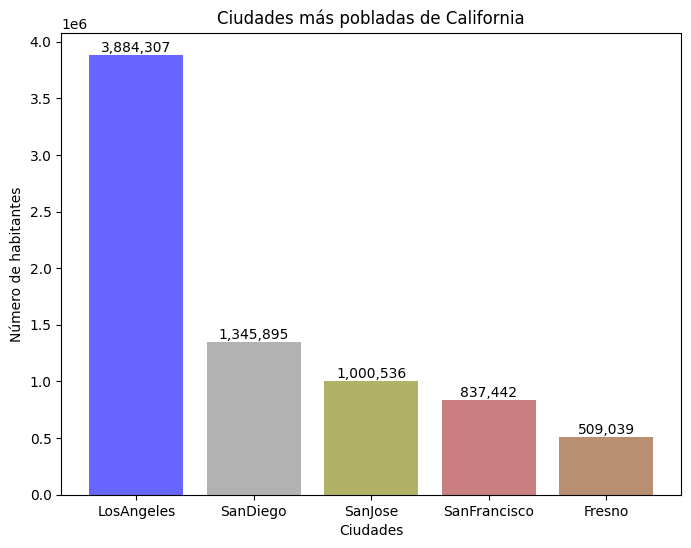

In [26]:
plt.figure(figsize=(8,6))
top5 = df.nlargest(5, "population_total")
colors = ["blue", "gray", "olive", "brown", "saddlebrown"]

bars = plt.bar(top5["city"], top5["population_total"], color=colors, alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:,.0f}",
        ha="center", va="bottom"
    )

plt.title("Ciudades más pobladas de California")
plt.xlabel("Ciudades")
plt.ylabel("Número de habitantes")
plt.show()

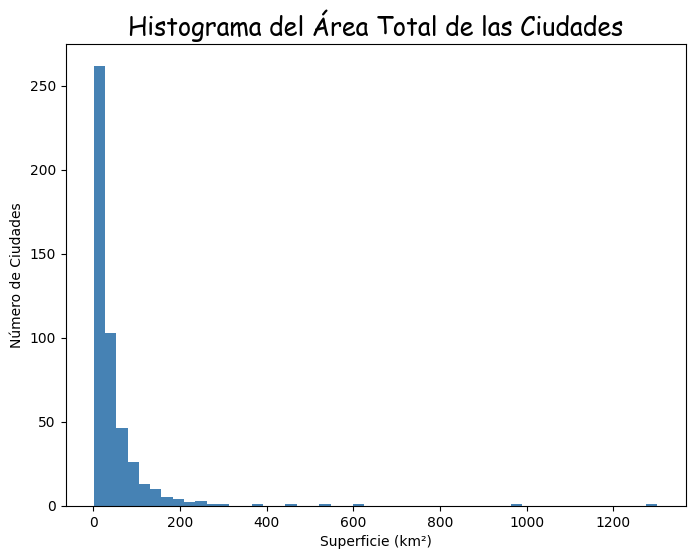

In [28]:
plt.figure(figsize=(8,6))
plt.hist(df["area_total_km2"], bins=50, color='steelblue')
plt.title("Histograma del Área Total de las Ciudades", fontname = "cursive", fontsize=18) # "Bradley Hand ITC" sale que no se encuentra.
plt.xlabel("Superficie (km²)")
plt.ylabel("Número de Ciudades")
plt.show()

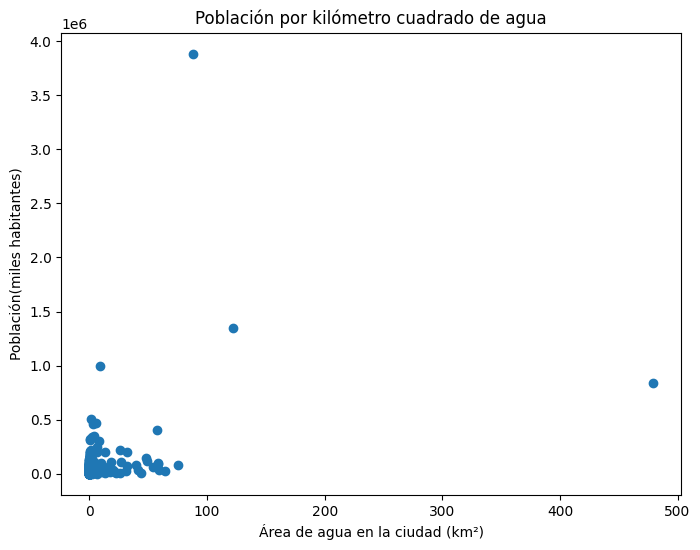

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(df["area_water_km2"], df["population_total"])
plt.xlabel("Área de agua en la ciudad (km²)"); plt.ylabel("Población(miles habitantes)")
plt.title("Población por kilómetro cuadrado de agua")
plt.show()

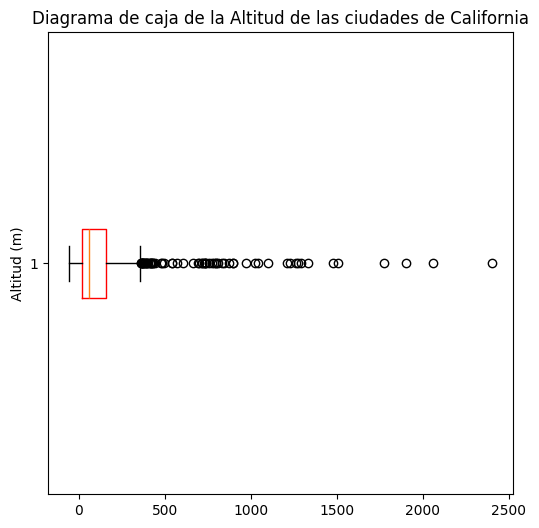

In [ ]:
plt.figure(figsize=(6,6))
plt.boxplot(df["elevation_m"], vert=False,
            boxprops=dict(color='red'),)
plt.title("Diagrama de caja de la Altitud de las ciudades de California")
plt.ylabel("Altitud (m)")
plt.show()

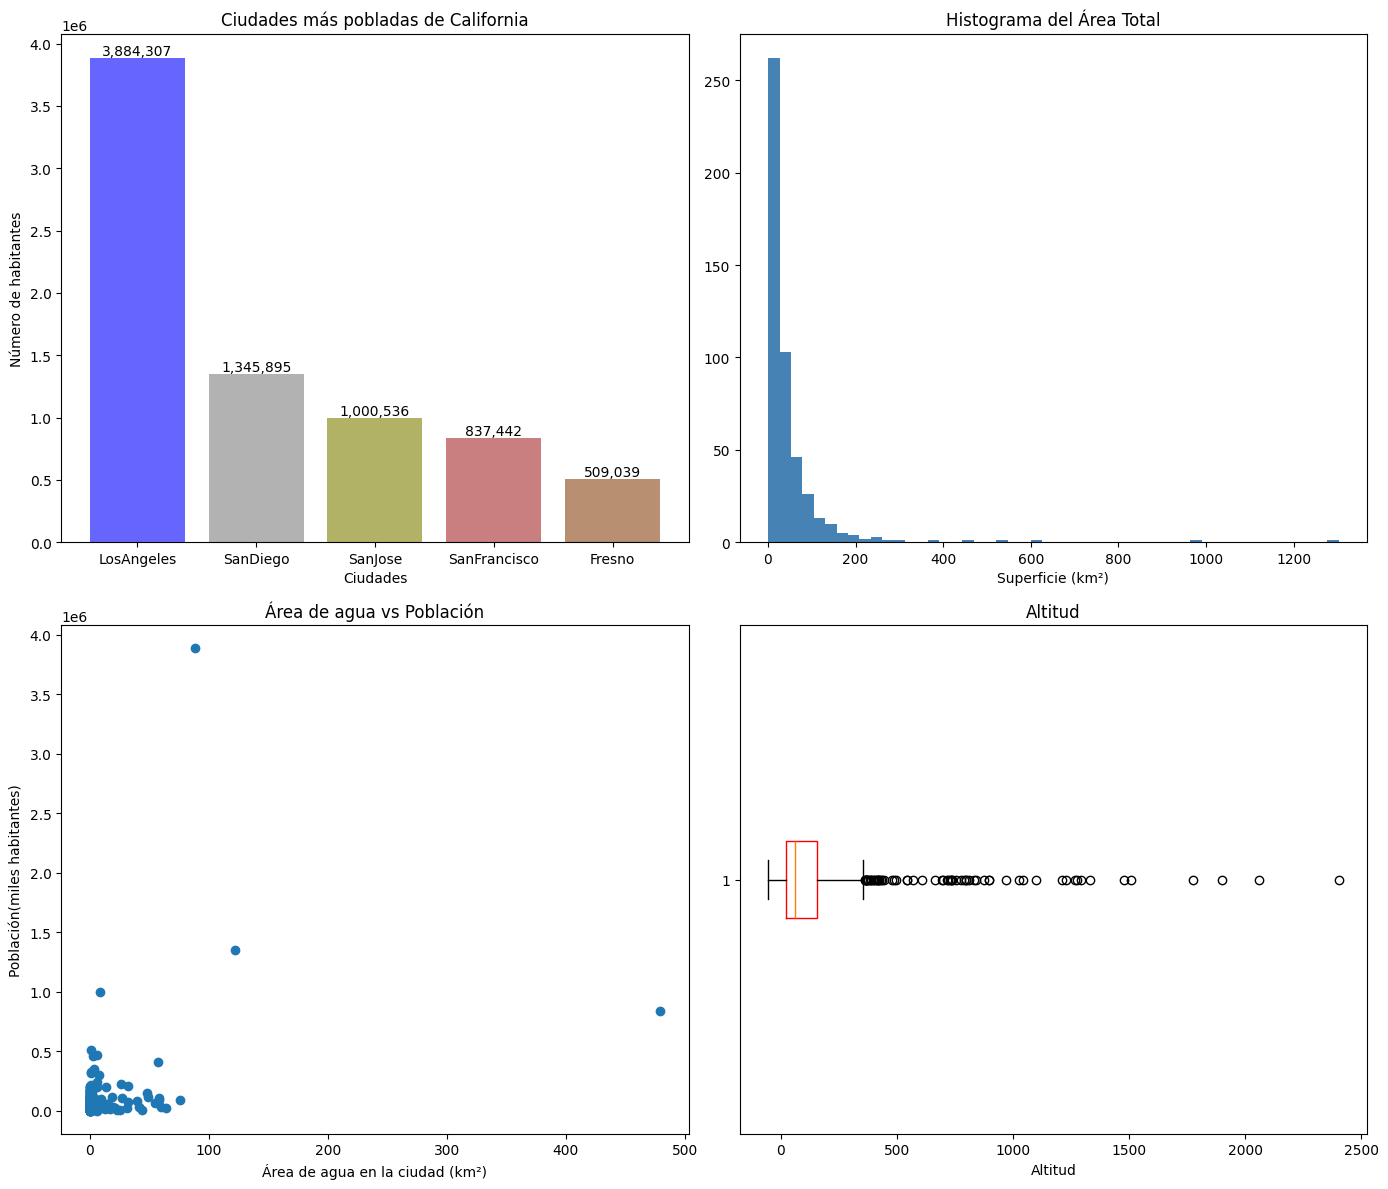

In [45]:
fig, axs = plt.subplots(2,2, figsize=(14,12))

axs[0,0].bar(top5['city'], top5["population_total"], color=colors, alpha=0.6)
for i,v in enumerate(top5["population_total"]):
    axs[0,0].text(i, v, f"{v:,.0f}", ha="center", va="bottom")
axs[0,0].set_title("Ciudades más pobladas de California")
axs[0,0].set_xlabel("Ciudades")
axs[0,0].set_ylabel("Número de habitantes")

axs[0,1].hist(df["area_total_km2"], bins=50, color="steelblue")
axs[0,1].set_title("Histograma del Área Total")
axs[0,1].set_xlabel("Superficie (km²)")
axs[0,1].set_label("Número de Ciudades")

axs[1,0].scatter(df["area_water_km2"], df["population_total"])
axs[1,0].set_title("Área de agua vs Población")
axs[1,0].set_xlabel("Área de agua en la ciudad (km²)")
axs[1,0].set_ylabel("Población(miles habitantes)")

axs[1,1].boxplot(df["elevation_m"], vert=False,
                 boxprops=dict(color='red'))
axs[1,1].set_title("Altitud")
axs[1,1].set_xlabel("Altitud")

plt.tight_layout()
plt.show()

#### #1.3

Graba la figura en un archivo .png y sube el archivo a tu repositorio personal junto con el notebook.

In [46]:
fig.savefig("figura_combinada.png", dpi=300, bbox_inches="tight")